# Correlation Analysis of the used indexes

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
v_sp500 = pd.read_csv('S&P500.csv', parse_dates=True)
v_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [4]:
v_vix = pd.read_csv('VIX.csv', parse_dates=True)
v_vix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,24.360001,26.150000,23.980000,24.209999,24.209999,0
1,2000-01-04,24.940001,27.180000,24.799999,27.010000,27.010000,0
2,2000-01-05,27.980000,29.000000,25.850000,26.410000,26.410000,0
3,2000-01-06,26.680000,26.709999,24.700001,25.730000,25.730000,0
4,2000-01-07,25.139999,25.170000,21.719999,21.719999,21.719999,0


In [5]:
sp500_vix_close_corr = v_sp500['Close'].corr(v_vix['Close'])
sp500_vix_close_corr

-0.43107968560857962

In [6]:
sp500_vix_close_vol_corr = v_sp500['Volume'].corr(v_vix['Close'])
sp500_vix_close_vol_corr

0.301312039626148

In [7]:
v_monthly_EMV_index =  pd.read_excel('EMV_Data.xlsx') 
v_monthly_EMV_index = v_monthly_EMV_index[:-1]
v_monthly_EMV_index.head()

,Year,Month,Overall EMV Tracker,Policy-Related EMV Tracker,Infectious Disease EMV Tracker,Macroeconomic News and Outlook EMV Tracker,Macro – Broad Quantity Indicators EMV Tracker,Macro – Inflation EMV Indicator,Macro – Interest Rates EMV Tracker,Macro – Other Financial Indicators EMV Tracker,...,Housing and Land Management EMV Tracker,Other Regulation EMV Tracker,National Security Policy EMV Tracker,Government-Sponsored Enterprises EMV Tracker,Trade Policy EMV Tracker,Healthcare Policy EMV Tracker,Food and Drug Policy EMV Tracker,"Transportation, Infrastructure, and Public Utilities EMV Tracker",Elections and Political Governance EMV Tracker,Agricultural Policy EMV Tracker
0,1985,1.0,11.304017,5.397642,0.322972,8.074298,2.018574,4.037149,4.037149,0.645944,...,0.080743,0.080743,1.049659,0.322972,0.080743,0.484458,0.080743,0.242229,0.161486,0.080743
1,1985,2.0,9.461739,4.269774,0.323478,7.278260,1.617391,2.911304,2.911304,0.404348,...,0.080870,0.161739,2.345217,0.323478,0.080870,0.970435,0.000000,0.242609,0.323478,0.080870
2,1985,3.0,10.997636,4.873834,0.578823,7.524698,2.149914,3.721005,3.638316,0.248067,...,0.082689,0.413445,0.744201,0.578823,0.165378,0.248067,0.000000,0.000000,0.082689,0.082689
3,1985,4.0,9.267448,4.496748,0.142576,7.342671,1.924778,2.423794,3.920844,0.356440,...,0.000000,0.356440,0.712881,0.570305,0.142576,0.071288,0.000000,0.285152,0.142576,0.000000
4,1985,5.0,9.836281,4.316045,0.330077,7.459730,2.574597,2.574597,3.960918,0.396092,...,0.066015,0.264061,0.924214,0.462107,0.132031,0.198046,0.132031,0.462107,0.132031,0.000000


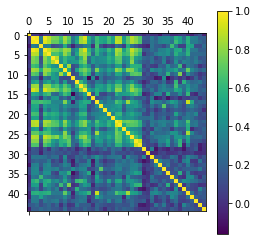

In [13]:
v_monthly_EMV_corr = v_monthly_EMV_index.corr()
plt.matshow(v_monthly_EMV_corr)
cb = plt.colorbar()
plt.show()


In [11]:
v_monthly_EMV_corr.head()

,Month,Overall EMV Tracker,Policy-Related EMV Tracker,Infectious Disease EMV Tracker,Macroeconomic News and Outlook EMV Tracker,Macro – Broad Quantity Indicators EMV Tracker,Macro – Inflation EMV Indicator,Macro – Interest Rates EMV Tracker,Macro – Other Financial Indicators EMV Tracker,Macro – Labor Markets EMV Tracker,...,Housing and Land Management EMV Tracker,Other Regulation EMV Tracker,National Security Policy EMV Tracker,Government-Sponsored Enterprises EMV Tracker,Trade Policy EMV Tracker,Healthcare Policy EMV Tracker,Food and Drug Policy EMV Tracker,"Transportation, Infrastructure, and Public Utilities EMV Tracker",Elections and Political Governance EMV Tracker,Agricultural Policy EMV Tracker
Month,1.000000,0.024826,0.028305,-0.068219,0.030917,0.030150,-0.009898,0.035357,0.068494,0.003241,...,0.064419,-0.011012,-0.006244,0.028825,0.062233,-0.019546,-0.044106,0.054873,0.136864,-0.046627
Overall EMV Tracker,0.024826,1.000000,0.973360,0.337570,0.975137,0.882285,0.771367,0.756198,0.645487,0.838384,...,0.379104,0.312423,0.561520,0.486006,0.261482,0.569584,0.342317,0.323319,0.188938,0.188314
Policy-Related EMV Tracker,0.028305,0.973360,1.000000,0.291594,0.941161,0.871383,0.723110,0.727267,0.602505,0.818018,...,0.382970,0.276100,0.630290,0.488360,0.337328,0.584326,0.325381,0.323485,0.242503,0.183288
Infectious Disease EMV Tracker,-0.068219,0.337570,0.291594,1.000000,0.324557,0.350440,0.098783,0.142556,0.202757,0.553471,...,0.233748,0.631482,0.321608,0.061734,0.066546,0.540409,0.504671,0.114647,0.107932,0.246495
Macroeconomic News and Outlook EMV Tracker,0.030917,0.975137,0.941161,0.324557,1.000000,0.915058,0.794448,0.772578,0.704275,0.831666,...,0.430240,0.298202,0.540346,0.547730,0.268391,0.566383,0.311592,0.300602,0.182494,0.194627
